In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import pickle

with open("notebooks/data/processed/processed_df.pkl", "rb") as f:
    df = pickle.load(f)

In [3]:
df = pd.get_dummies(df, columns=["FareGroup"], drop_first=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     891 non-null    int64   
 1   Survived        891 non-null    int64   
 2   Pclass          891 non-null    int64   
 3   Name            891 non-null    object  
 4   Sex             891 non-null    int64   
 5   Age             891 non-null    float64 
 6   SibSp           891 non-null    int64   
 7   Parch           891 non-null    int64   
 8   Ticket          891 non-null    object  
 9   Embarked        891 non-null    int64   
 10  AgeGroup        891 non-null    category
 11  Fare            891 non-null    float64 
 12  FareGroup_Low   891 non-null    bool    
 13  FareGroup_Mid   891 non-null    bool    
 14  FareGroup_High  891 non-null    bool    
dtypes: bool(3), category(1), float64(2), int64(7), object(2)
memory usage: 80.2+ KB


In [5]:
# Hedef değişken
y = df['Survived']

# Kullanılmayacak sütunları çıkar
X = df.drop(['Survived', 'Name', 'Ticket', 'PassengerId', 'Fare'], axis=1)

# Eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Tahmin yap
y_pred = model.predict(X_test)

# Doğruluk oranı
accuracy = accuracy_score(y_test, y_pred)
print(f"Test doğruluk oranı: {accuracy:.2%}")

Test doğruluk oranı: 80.45%


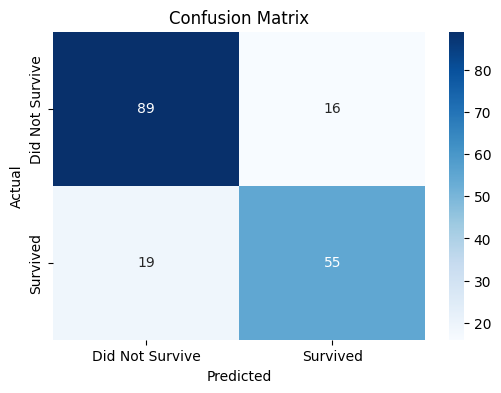

In [8]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Görselleştir
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Did Not Survive', 'Survived'], yticklabels=['Did Not Survive', 'Survived'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [9]:
# Precision, recall, f1-score gibi detaylı metrikler
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [10]:
# Özellik isimlerini ve katsayıları al
feature_names = X.columns
coefficients = model.coef_[0]

# Her özelliğin katsayısını yazdır
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.4f}")

Pclass: -0.9833
Sex: -2.6090
Age: -0.1105
SibSp: -0.3183
Parch: -0.1240
Embarked: 0.2919
AgeGroup: 0.8053
FareGroup_Low: -0.0875
FareGroup_Mid: 0.0937
FareGroup_High: 0.0448
